In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mne

# MNE integration

In [Databases handler](01-databases.html) it is explained how to get *raw* data from the databases, this section introduces how to get [MNE](https://mne.tools/stable/index.html) data formats.

In [6]:
from gcpds.utils import loaddb

db = loaddb.BCI_CIV_2a('BCI2a_database')
db.load_subject(1)

`db.get_epochs()` return an object [mne.Epochs](https://mne.tools/stable/generated/mne.Epochs.html?highlight=epoch) this make database compatible with all **MNE** tools.

In [7]:
epochs = db.get_epochs()
epochs

<EpochsArray  |   273 events (all good), -2 - 4.996 sec, baseline off, ~80.2 MB, data loaded,
 'feet': 68
 'left hand': 69
 'right hand': 69
 'tongue': 67>

## Evokeds

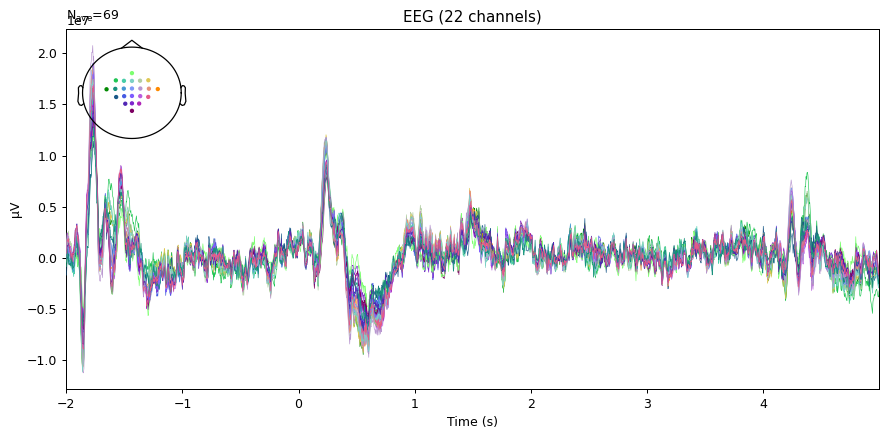

In [8]:
evoked = epochs['left hand'].average()

fig = plt.figure(figsize=(10, 5), dpi=90)
ax = plt.subplot(111)
evoked.plot(axes=ax, spatial_colors=True);

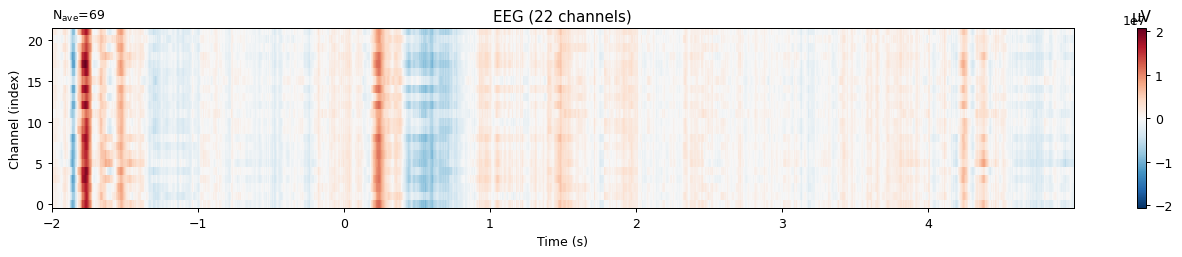

In [9]:
fig = plt.figure(figsize=(15, 3), dpi=90)
ax = plt.subplot(111)
evoked.plot_image(axes=ax);

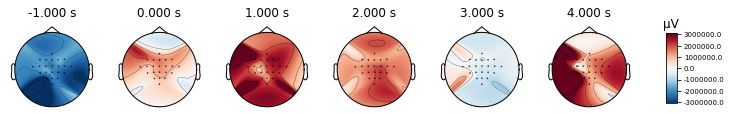

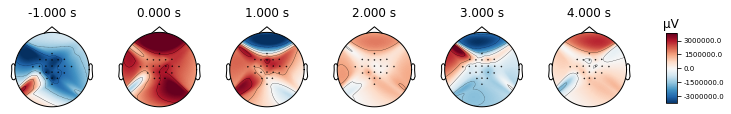

In [12]:
times = np.linspace(-1, 4, 6)

epochs['left hand'].average().plot_topomap(times,)
epochs['right hand'].average().plot_topomap(times,);

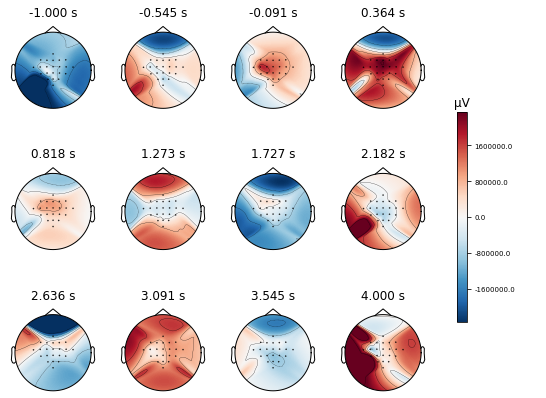

In [13]:
evoked = epochs['left hand'].average()
evoked = evoked.filter(3, 30)

times = np.linspace(-1, 4, 12)
evoked.plot_topomap(times, ncols=4, nrows=3);

In [ ]:
evoked = epochs['right hand'].average()
evoked = evoked.filter(8, 12)

times = np.linspace(-1, 4, 5*30)
fig, anim  = evoked.animate_topomap(times=times, ch_type='eeg', time_unit='s', blit=False, butterfly=True)
anim.save('images/anim.gif', writer='imagemagick', fps=10);

![](images/anim.gif)

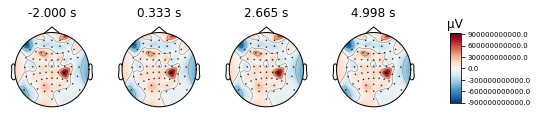

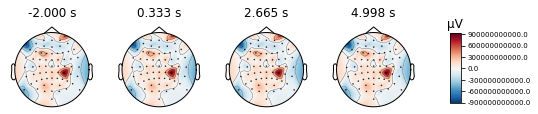

In [9]:
from gcpds.utils import loaddb
db = loaddb.GIGA_MI_ME('GIGA')
db.load_subject(1)
db.get_data()
epochs = db.get_epochs()
epochs['left hand'].average().plot_topomap()
epochs['right hand'].average().plot_topomap();


In [14]:
dl, _ = db.get_data(classes=['left hand'])
dr, _ = db.get_data(classes=['right hand'])

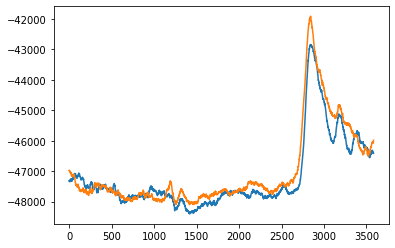

In [30]:
q = epochs['left hand'].average()

m = epochs['right hand'].average()

plt.plot(q.data[0])
plt.plot(m.data[0])